<span style="font-size:3em; font-weight:bold;">
             Projet IBI d'Ilan Marwan et Youssef

<img src="PROJETIBI.jpg" alt="Kerala" width=400>

<span style="font-size:2em; font-weight:bold;">
    Introduction

Dans le cadre de notre projet de bioinformatique sur le réchauffement climatique, nous avons cherché une région du monde particulièrement belle et intéressante à étudier. Après avoir examiné plusieurs sites recommandés, nous avons décidé de nous concentrer sur l'État du Kerala en Inde, qui offre des paysages magnifiques et des données pertinentes pour notre projet.

<span style="font-size:1.25em; font-weight:normal;">
Qu'est ce que le Kerala ?

<img src="pos_Kerala.jpg" alt="Kerala" width="200">

Le Kerala est un État côtier de l'Inde, connu pour ses paysages verdoyants, ses plages, ses collines vallonnées et ses plantations d'épices et de thé. Le tourisme est un secteur clé de son économie, avec des millions de visiteurs chaque année qui viennent profiter de ses attractions naturelles, culturelles et religieuses. Le Kerala est également considéré comme l'un des États les plus développés de l'Inde, avec une économie diversifiée incluant la production d'épices, de caoutchouc et de noix de coco, ainsi que des services tels que les technologies de l'information, la santé et l'éducation.

<span style="font-size:1.25em; font-weight:normal;">
Pourquoi le Kerala ?

Au-delà de notre critère initial de choisir une région "magnifique", nous avons considéré que le Kerala serait une région d'étude intéressante pour notre projet. En effet, le Kerala subit directement les impacts du réchauffement climatique, qui ont une incidence sur les précipitations dans cette région. Ces précipitations sont très importantes car elles affectent directement l'agriculture, et donc l'économie de la région. Mais ce qui est encore plus important, c'est qu'elles ont une influence sur la vie de centaines d'habitants qui en dépendent.

<span style="font-size:1.25em; font-weight:normal;">
La tâche

Dans ce projet, nous allons nous intéresser à l'étude des précipitations dans la région du Kerala, en examinant leurs tendances, leur complexité et leurs conséquences. Nous allons également examiner l'évolution du climat en Inde, qui est la cause de ces perturbations, et finalement il y aura une partie sur l'agriculture qui dépend forcément de tout ce que nous venons de citer.
Plus fondamentalement, ce projet vise à approfondir nos compétences en Python en découvrant de nouvelles bibliothèques tout en essayant de sensibiliser sur le réchauffement climatique. Nous souhaitons être rigoureux dans notre démarche, que ce soit dans notre rédaction ou dans nos visualisations, en essayant de simplifier autant que possible nos explications. L'objectif est de démontrer notre progression en Python ainsi que notre capacité à répondre à un problème scientifique.

<span style="color:green">
Librairies à télécharger en plus : pymannkendall, folium, geopy  

<span style="color:green">
J'ai mis à chaque fois la commande d'installation au dessus de la cellule pour installer directement sur le notebook

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import plotly.express as px
%matplotlib inline

<span style="font-size:2em; font-weight:bold;">
Comment évolue les précipitations ?

In [2]:
df = pd.read_csv('Kerala-Rainfall-Historical.csv')

Aperçevons le dataset :

In [3]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Kerala,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1
1,Kerala,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2
2,Kerala,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1
3,Kerala,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3
4,Kerala,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1


Nous disposons d'un jeu de données assez clair qui répertorie les précipitations mensuelles et saisonnières par année.

In [4]:
df.shape

(117, 19)

In [5]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND'],
      dtype='object')

In [6]:
print("Le dataset est entre ", df['YEAR'].min(), "et", df['YEAR'].max())

Le dataset est entre  1901 et 2017


Nous avons des données pluviométriques de 1901 jusqu'à 2017

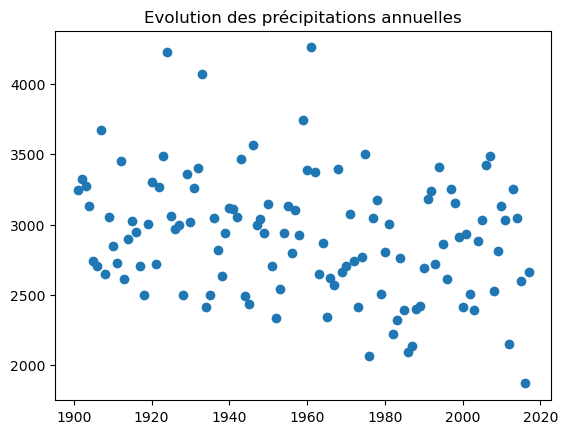

In [7]:
plt.scatter(df['YEAR'], df['ANNUAL'])
plt.title('Evolution des précipitations annuelles')
plt.show()

On remarque une certaine dégression, mais également des outliers dus à des événements extrêmes ou à des erreurs de saisie.

In [8]:
#je regarde notamment s'il y a des datetime
df.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
JF             float64
MAM            float64
JJAS           float64
OND            float64
dtype: object

On va traiter les outliers pour généraliser un peu mieux la tendance, on va utiliser la méthode des deux écarts-types.

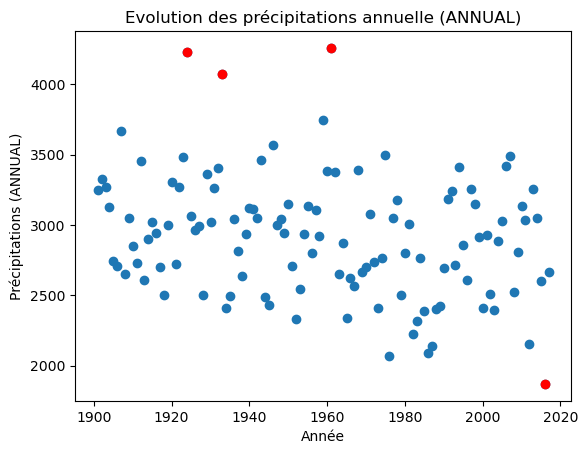

In [9]:
annual_data = df['ANNUAL']

annual_mean = annual_data.mean()
annual_std = annual_data.std()

aberrant_mask = ((annual_data < annual_mean - 2*annual_std) | (annual_data > annual_mean + 2*annual_std))
aberrant_data = annual_data[aberrant_mask]
aberrant_years = df['YEAR'][aberrant_mask]

plt.scatter(df['YEAR'], annual_data)
plt.scatter(aberrant_years, aberrant_data, color='red')
plt.xlabel('Année')
plt.ylabel('Précipitations (ANNUAL)')
plt.title('Evolution des précipitations annuelle (ANNUAL)')

clean_df = df.loc[~aberrant_mask, ['YEAR', 'ANNUAL']]

Ensuite sur ces données pré-traitées on va faire une régression linéaire pour voir le signe du coefficient directeur.

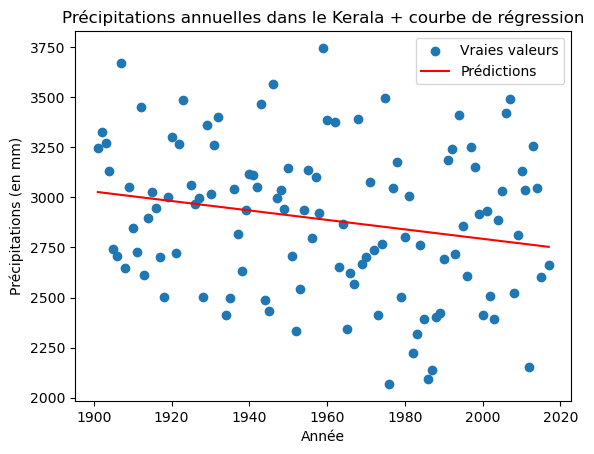

In [10]:
from sklearn.linear_model import LinearRegression

X = clean_df['YEAR'].values.reshape(-1, 1)
y = clean_df['ANNUAL'].values.reshape(-1, 1)

reg = LinearRegression()

reg.fit(X, y)

y_pred = reg.predict(X)

plt.scatter(X, y, label='Vraies valeurs')
plt.plot(X, y_pred, 'r', label='Prédictions', linestyle='-')
plt.xlabel('Année')
plt.ylabel('Précipitations (en mm)')
plt.title('Précipitations annuelles dans le Kerala + courbe de régression')
plt.legend()
plt.show()


In [11]:
reg.coef_[0][0]

-2.357595499845913

In [12]:
data_2050 = np.array([[2050]])
annual_precipitation_2050 = reg.predict(data_2050)

print("Précipitations annuelles estimées pour 2050 :", annual_precipitation_2050[0][0])

Précipitations annuelles estimées pour 2050 : 2675.2253156290635


On estime, en prenant de grosses pincettes, qu'en 2050 on descendra à une précipitation annuelle de 2675 mm.

Le coefficient semble négatif, on peut déjà conjecturer que les précipitations ont baissées de manière générale dans cette région, cependant nous allons vérifier la significativité de cette hypothèse.

i) Bootstrap
- Méthode qui consiste à réechantilloner plusieurs fois dans nos données puis prélever les coefficients puis vérifier sur intervalle de confiance de 95 % qu'il est significativement négatif.

In [13]:
from sklearn.utils import resample
def bootstrap(X, y):
    n_boot = 1000
    coefs = []

    for _ in range(n_boot):
        X_resampled, y_resampled = resample(X, y)

        reg_bootstrapped = LinearRegression()
        reg_bootstrapped.fit(X_resampled, y_resampled)
        coefs.append(reg_bootstrapped.coef_[0][0])

    coefs = np.array(coefs)

    lower_bound = np.percentile(coefs, 2.5)
    upper_bound = np.percentile(coefs, 97.5)

    print("Intervalle de confiance à 95% pour le coefficient :", (lower_bound, upper_bound))

    if lower_bound < 0 < upper_bound:
        print("L'intervalle de confiance à 95% contient 0, on ne peut pas conclure que le coefficient est négatif.")
    else:
        if lower_bound >= 0:
            print("Le coefficient n'est pas négatif, l'intervalle de confiance à 95% est entièrement positif.")
        elif upper_bound <= 0:
            print("Le coefficient est négatif, l'intervalle de confiance à 95% est entièrement négatif.") 

In [14]:
bootstrap(X, y)

Intervalle de confiance à 95% pour le coefficient : (-4.21448938827406, -0.48957494538418267)
Le coefficient est négatif, l'intervalle de confiance à 95% est entièrement négatif.


On remarque que les deux bornes sur l'intervalle de confiances de 95 % sont négatives, on peut donc en déduire une dégression significative de la précipitation annuelle. 

Pour conforter notre analyse et dans le but de découvrir de nouvelles méthodes statistiques, nous allons faire un test Mann-Kendall. Nos données ne sont pas des moyennes, donc on ne peut pas effectuer un test ANOVA.

ii) Mann-Kendall
- Le test de Mann-Kendall est un test non paramétrique utilisé pour détecter les tendances monotones dans une série chronologique.

In [15]:
#on met la commande d'installation directement ici.

In [16]:
pip install pymannkendall

  Using cached pymannkendall-1.4.3-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pymannkendall as mk
annual_result = mk.original_test(df['ANNUAL'])

In [18]:
print("Résultat du test Mann-Kendall pour la colonne ANNUAL")
print(annual_result)

Résultat du test Mann-Kendall pour la colonne ANNUAL
Mann_Kendall_Test(trend='decreasing', h=True, p=0.013469698053699686, z=-2.471103095779681, Tau=-0.15473032714412024, s=-1050.0, var_s=180206.0, slope=-2.9477272727272688, intercept=3102.0681818181815)


In [19]:
tendance = annual_result.trend
p_valeur = annual_result.p

if tendance == 'increasing':
    print("La tendance des précipitations annuelles est à la hausse.")
elif tendance == 'decreasing':
    print("La tendance des précipitations annuelles est à la baisse.")
else:
    print("Il n'y a pas de tendance significative dans les précipitations annuelles.")

significatif = p_valeur < 0.05
if significatif:
    print("La tendance est statistiquement significative (p < 0.05).")
else:
    print("La tendance n'est pas statistiquement significative (p >= 0.05).")

La tendance des précipitations annuelles est à la baisse.
La tendance est statistiquement significative (p < 0.05).


Le test renvoie la tendance (trend) , si elle est significative (h), la pvalue ( p ) et d'autres valeurs. On retrouve ici une tendance dégressive, significative avec une pvalue qui invalide l'hypothèse nulle (H0).

<span style="font-size:1.25em; font-weight:normal;">
Résultats :

On constate qu'en effet il y a des évolutions de la précipitation annuelle au fil des années. De par l'analyse faite avec les différentes méthodes utilisées nous estimons une baisse des précipitations annuelles.

<span style="font-size:2em; font-weight:bold;">
Evolution saisonnière, un aperçu sur la "mousson"

Dans cette partie nous allons plus nous intéresser à l'évolution des précipitations intra-annuel.

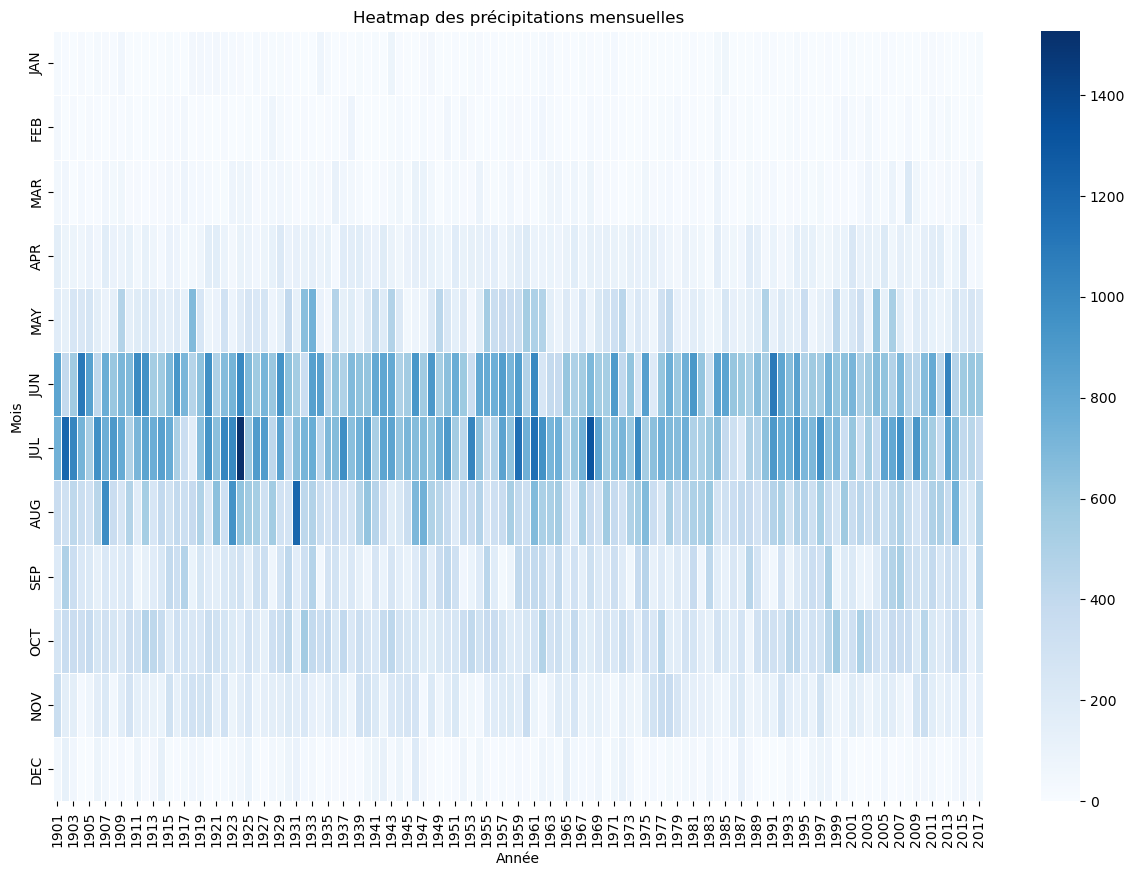

In [20]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

heatmap_data = df.set_index('YEAR')[months].T

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(heatmap_data, cmap="Blues", annot=False, fmt=".1f", linewidths=.5, ax=ax)

ax.set_title('Heatmap des précipitations mensuelles')
ax.set_xlabel('Année')
ax.set_ylabel('Mois')

plt.show()

On remarque que la grande majorité des précipitations est concentrée sur les mois de juin juillet août, qui correspondent à l'époque de l'année où il y a la mousson.

Pour y voir un peu plus clair, visualisons les saisons.

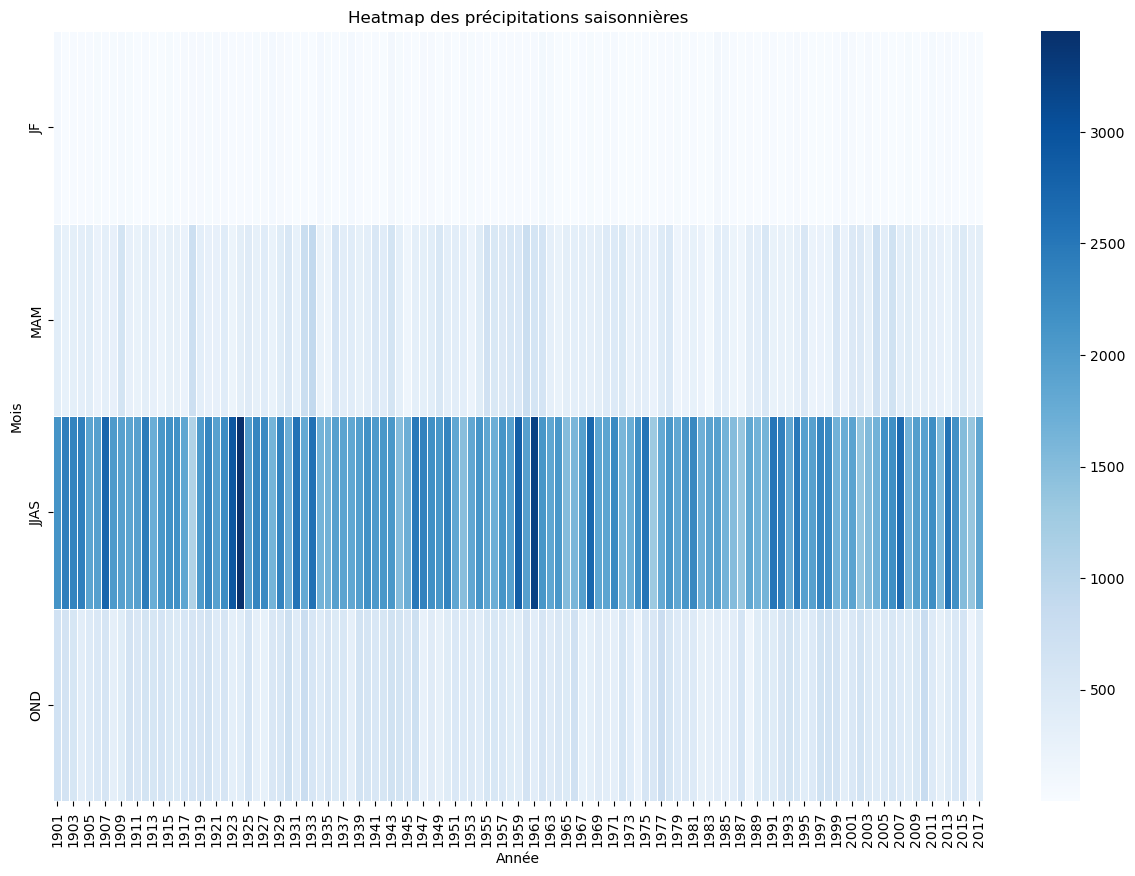

In [21]:
months2 = ['JF', 'MAM', 'JJAS', 'OND']

heatmap_data2 = df.set_index('YEAR')[months2].T

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(heatmap_data2, cmap="Blues", annot=False, fmt=".1f", linewidths=.5, ax=ax)

ax.set_title('Heatmap des précipitations saisonnières')
ax.set_xlabel('Année')
ax.set_ylabel('Mois')

plt.show()

En effet, c'est encore plus visible que dans l'heatmap précédente. On peut observer que les précipitations sont presque exclusivement concentrées pendant la période de mousson.

En moyenne la mousson représente 69.16668450808568 % de la précipitation annuelle


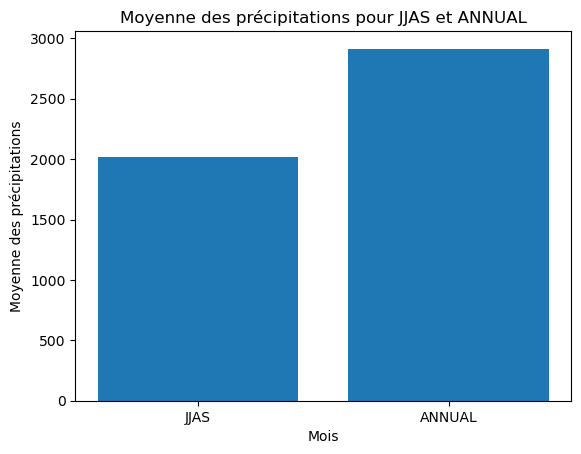

In [22]:
mean_JJAS = df['JJAS'].mean()
mean_ANNUAL = df['ANNUAL'].mean()

plt.bar(['JJAS', 'ANNUAL'], [mean_JJAS, mean_ANNUAL])

plt.title('Moyenne des précipitations pour JJAS et ANNUAL')
plt.xlabel('Mois')
plt.ylabel('Moyenne des précipitations')
print("En moyenne la mousson représente", ((mean_JJAS / mean_ANNUAL)*100) ,"% de la précipitation annuelle")
plt.show()

Et en effet, cette figure nous montre que la mousson représente en moyenne environ 70 % de la précipitation annuelle.

<span style="font-size:1.25em; font-weight:normal;">
Qu'est ce que la mousson ?

<img src="mousson_gif.gif" alt="Mousson" width=400>

La mousson est un phénomène météorologique saisonnier qui se produit principalement dans les régions tropicales et subtropicales. Il s'agit d'un vent saisonnier qui change de direction de manière régulière, amenant des pluies abondantes pendant une période de plusieurs mois. La mousson est principalement causée par la différence de température entre les masses d'air continentales et les océans environnants, ainsi que par les mouvements du soleil et de la Terre.

<span style="font-size:1.25em; font-weight:normal;">
Focus sur la mousson dans le Kerala.

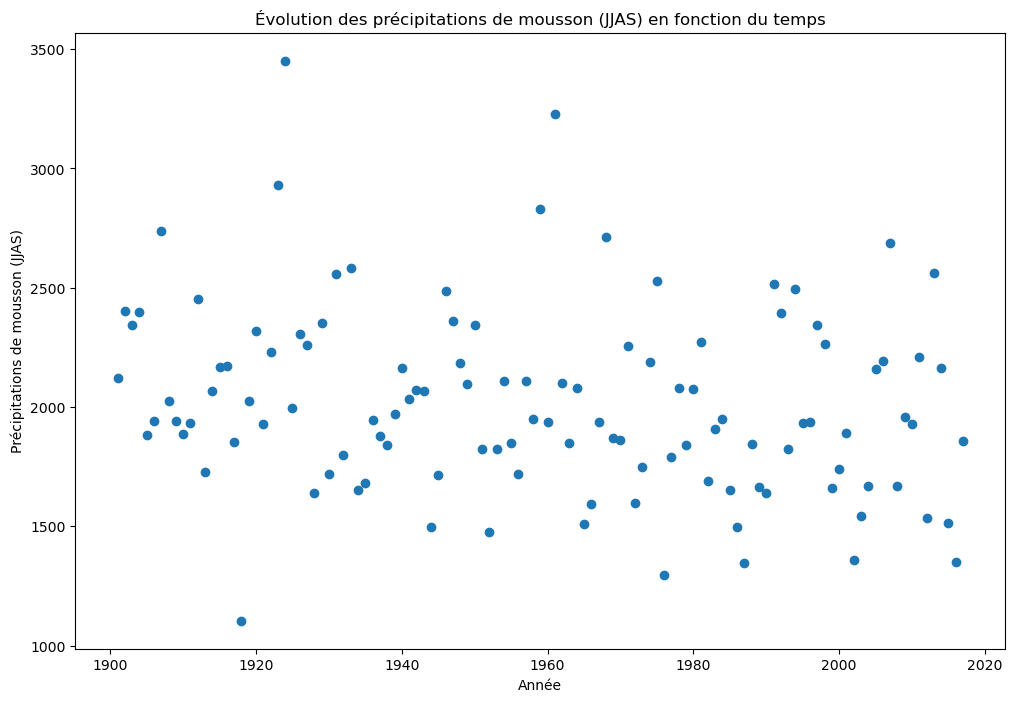

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df['YEAR'], df['JJAS'])

ax.set_title("Évolution des précipitations de mousson (JJAS) en fonction du temps")
ax.set_xlabel("Année")
ax.set_ylabel("Précipitations de mousson (JJAS)")

plt.show()

De manière similaire à l'évolution des précipitations annuelles, on observe une tendance dégressive dans les précipitations intra-annuelles, avec certains outliers. Cependant, on remarque également des points assez bas vers les dernières années du jeu de données.

i) Même travail, on enlève les outliers pour mieux généraliser.

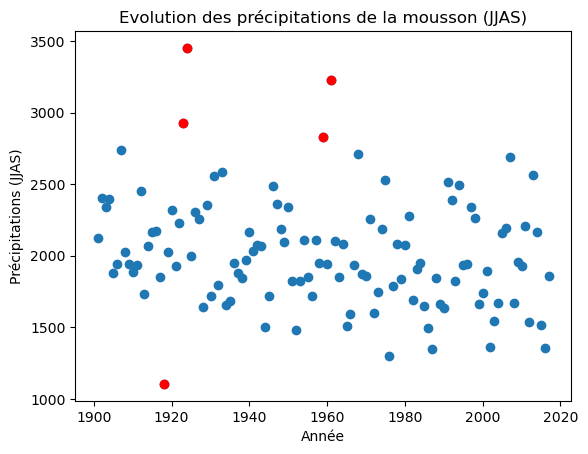

In [24]:
jjas_data = df['JJAS']

jjas_mean = jjas_data.mean()
jjas_std = jjas_data.std()

aberrant_mask = ((jjas_data < jjas_mean - 2*jjas_std) | (jjas_data > jjas_mean + 2*jjas_std))
aberrant_data = jjas_data[aberrant_mask]
aberrant_years = df['YEAR'][aberrant_mask]

cleandf_mouss = df.loc[~aberrant_mask, ['YEAR', 'JJAS']]

plt.scatter(df['YEAR'], jjas_data)
plt.scatter(aberrant_years, aberrant_data, color='red')
plt.xlabel('Année')
plt.ylabel('Précipitations (JJAS)')
plt.title('Evolution des précipitations de la mousson (JJAS)')

plt.show()

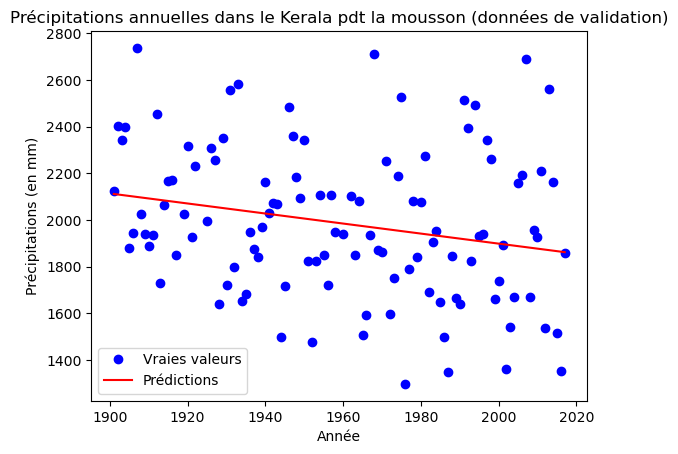

In [25]:
X = cleandf_mouss['YEAR'].values.reshape(-1, 1)
y = cleandf_mouss['JJAS'].values.reshape(-1, 1)

reg = LinearRegression()

reg.fit(X, y)

y_pred = reg.predict(X)

plt.plot(X, y, 'bo', label='Vraies valeurs')
plt.plot(X, y_pred, 'r', label='Prédictions', linestyle='-')
plt.xlabel('Année')
plt.ylabel('Précipitations (en mm)')
plt.title('Précipitations annuelles dans le Kerala pdt la mousson (données de validation)')
plt.legend()
plt.show()

In [26]:
reg.coef_[0][0]

-2.1511885545229

Effectivement, la régression linéaire montre un coefficient négatif, ce qui confirme la tendance régressive dans les précipitations intra-annuelles.

ii) Utilisation de la classe TheilSenRegressor
- Le Theil-Sen Regressor est un algorithme de régression non paramétrique robuste utilisé pour estimer la pente d'une relation linéaire entre deux variables. En gros, il est moins sensible aux valeurs aberrantes (outliers) dans les données, ce qui en fait une méthode robuste pour estimer les tendances linéaires même en présence de données atypiques.

In [27]:
from sklearn.linear_model import TheilSenRegressor

X2 = df['YEAR'].values.reshape(-1, 1)
y2 = df['JJAS'].values

treg = TheilSenRegressor(random_state=0)
treg.fit(X2, y2.ravel())

y2_pred = treg.predict(X2)

print('Pente de la régression :', treg.coef_[0])

Pente de la régression : -2.5057762412965814


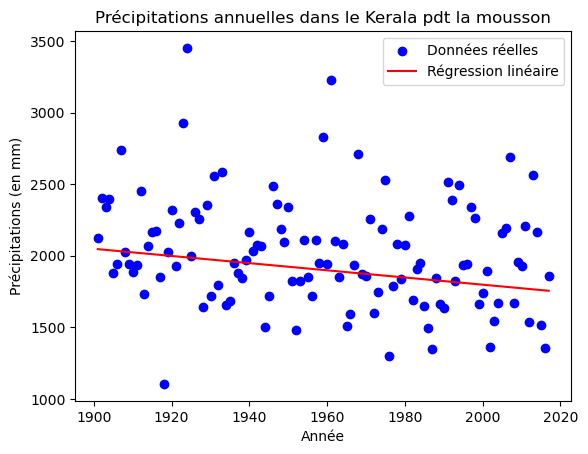

In [28]:
import matplotlib.pyplot as plt

plt.scatter(X2, y2, color='blue', label='Données réelles')
plt.plot(X2, y2_pred, color='red', label='Régression linéaire')
plt.xlabel('Année')
plt.ylabel('Précipitations (en mm)')
plt.title('Précipitations annuelles dans le Kerala pdt la mousson')
plt.legend()
plt.show()

De la même manière on retrouve un coefficient négatif.

ii) Test t, pour voir la significativité.
- Le test t est utilisé dans la fonction linregress de Scipy pour tester si la pente de la droite de régression linéaire entre deux variables est significativement différente de zéro

In [29]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['YEAR'], df['JJAS'])

print('Pente de la régression :', slope)
print('Valeur-p :', p_value)

Pente de la régression : -2.4316796295463736
Valeur-p : 0.02144985876004317


La p-value est inférieure à 0.05, ce qui suggère une significativité de la régression.

<span style="font-size:1.25em; font-weight:normal;">
On va s'intéresser à des périodes sèches.

On conjecture, en nous basant sur nos observations (notamment des valeurs des autres mois hors mousson qui ne sont pas connus pour leurs fortes précipitations), que nous considérons qu'une mousson est considérée comme "sèche" si elle est inférieure à un seuil de 70% de la moyenne, ce qui correspond à environ 1400 mm sur 4 mois. En effet, cela équivaudrait à une précipitation mensuelle de 350 mm, ce qui correspondrait à la précipitation de certains mois sans mousson.

In [30]:
df['JJAS'].mean()*0.7

1410.9816239316237

Repérons ces moussons sèches.

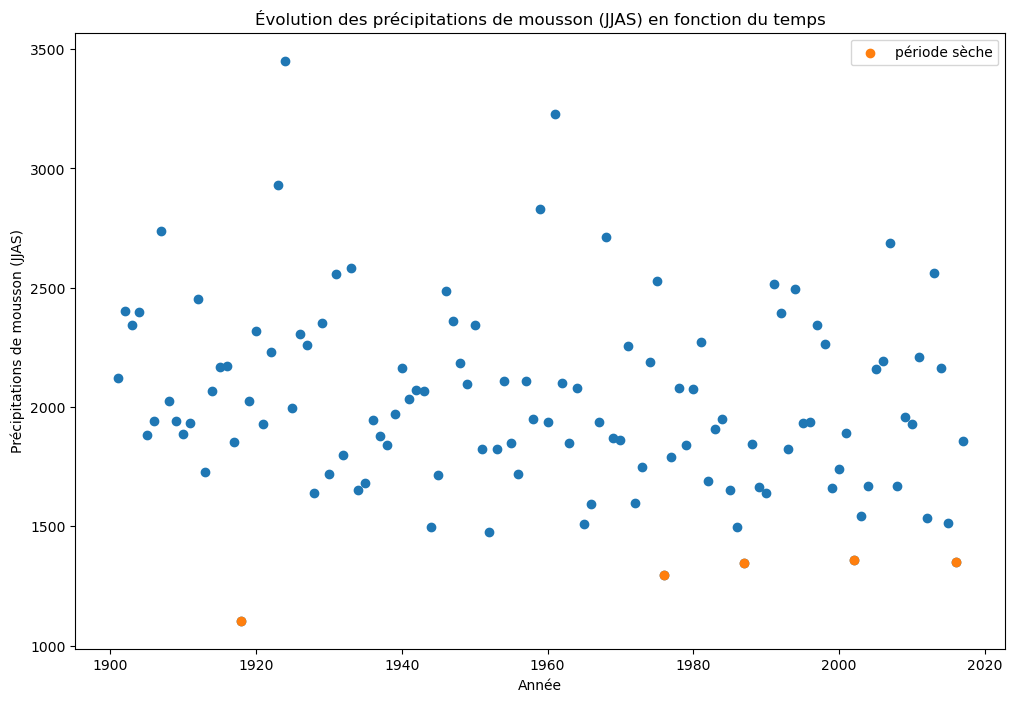

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

jjas_mean = df['JJAS'].mean()

ax.scatter(df['YEAR'], df['JJAS'])
ax.scatter(df.loc[df['JJAS'] < 1400, 'YEAR'], df.loc[df['JJAS'] < 1400, 'JJAS'], label='période sèche')

ax.set_title("Évolution des précipitations de mousson (JJAS) en fonction du temps")
ax.set_xlabel("Année")
ax.set_ylabel("Précipitations de mousson (JJAS)")

plt.legend()
plt.show()

On observe effectivement une concentration plus importante de valeurs élevées de précipitations pendant la deuxième partie du 20e siècle, mais on note également la présence de valeurs élevées, bien que moins fréquentes, dans les années 2000.

Focus sur les années 2000.

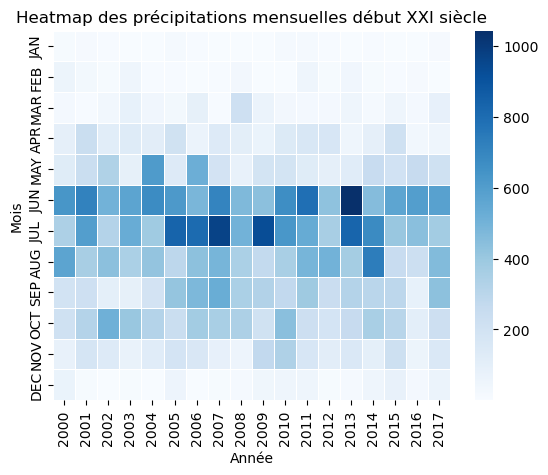

In [32]:
heatmap_data_2000 = df[df['YEAR'] >= 2000].set_index('YEAR')[months].T

fig, ax = plt.subplots()

sns.heatmap(heatmap_data_2000, cmap="Blues", annot=False, fmt=".1f", linewidths=.5, ax=ax)

ax.set_title('Heatmap des précipitations mensuelles début XXI siècle')
ax.set_xlabel('Année')
ax.set_ylabel('Mois')

plt.show()
# 2008 2016 2012

Effectivement, d'après les données, on peut observer des moussons à faible précipitation dans les années 2000, notamment en 2008 et 2017. On constate également une forte variabilité en 2007 et 2009, avec des pluies abondantes en juillet, dépassant les 1000 mm pour le mois. Pour comparaison, dans le district où la précipitation a été maximale en 2018 lors des inondations meurtrières, la précipitation pour un mois était d'environ 1400 mm. 

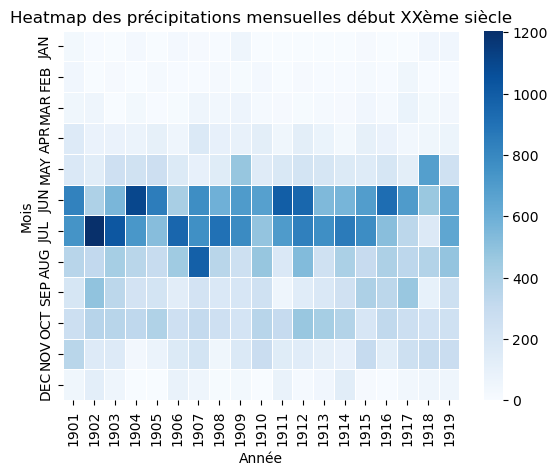

In [33]:
heatmap_data_1920 = df[df['YEAR'] < 1920 ].set_index('YEAR')[months].T

fig, ax = plt.subplots()

sns.heatmap(heatmap_data_1920, cmap="Blues", annot=False, fmt=".1f", linewidths=.5, ax=ax)

ax.set_title('Heatmap des précipitations mensuelles début XXème siècle')
ax.set_xlabel('Année')
ax.set_ylabel('Mois')

plt.show()

En effet, on peut observer davantage de points colorés, indiquant des précipitations importantes, au début du XXIe siècle. De plus, on remarque une certaine régularité dans la répartition de la mousson, qui ne s'étale pas de manière homogène sur l'année, contrairement au début du XXIe siècle où l'on peut voir que les mois de septembre et octobre sont plus souvent sollicités en termes de précipitations

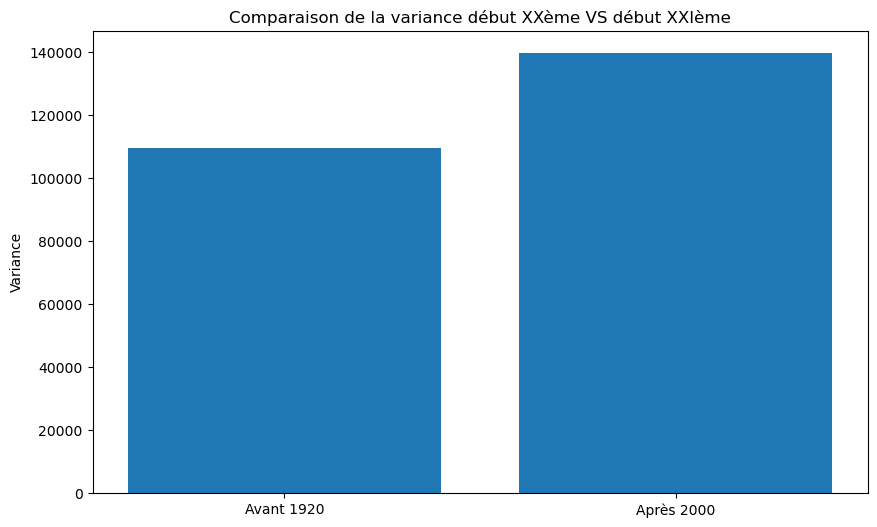

In [34]:
df_pre_1920 = df[df['YEAR'] <= 1920]
df_post_2000 = df[df['YEAR'] >= 2000]

var_pre_1920 = np.var(df_pre_1920['JJAS'])
var_post_2000 = np.var(df_post_2000['JJAS'])

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['Avant 1920', 'Après 2000'], [var_pre_1920, var_post_2000])
ax.set_title("Comparaison de la variance début XXème VS début XXIème")
ax.set_ylabel("Variance")
plt.show()

En effet, on constate une variance beaucoup plus élevée et donc des différences d'extrêmes plus élevées.

<span style="font-size:1.25em; font-weight:normal;">
Résultats :

Nous avons examiné ce qu'est la mousson et ce que cela représente en termes de précipitations tout au long de l'année (nous rappelons que cela représente environ 70% des précipitations annuelles dans le Kerala). Globalement, nous avons remarqué une baisse des précipitations pendant cette période et l'apparition de certaines moussons sèches au fil du temps. Nous avons également observé une "extension" des précipitations en octobre dans les années 2000, où ce mois contribue beaucoup plus qu'au début des années 1900. Enfin, nous avons constaté que la variance des précipitations est beaucoup plus élevée, avec des mois ayant des précipitations très élevées comme en 2007 ou 2009 qui coexistent avec ces moussons sèches. Cela nous laisse supposer que nous pouvons rencontrer des événements extrêmes opposés tels que des inondations mais également de la sécheresse.

Et en effet, l'exposition aux événements extrêmes opposés supposée est confirmée. En août 2018, il y a eu une mousson dévastatrice qui a causé la mort de centaines de personnes et la destruction de milliers d'habitations dans la région du Kerala. Peu de temps après, les pluies se sont raréfiées dans la région, confirmant ainsi notre observation précédente de la coexistence de moussons intenses et de sécheresses.
(cf : https://www.nationalgeographic.fr/environnement/2019/07/en-inde-une-crise-de-leau-sans-precedent)

<span style="font-size:2em; font-weight:bold;">
Exemple d'évènement extrême : Inondations de 2018

<img src="kerala_floods.jpg" alt="Kerala" width=400>

Durant le mois d'août 2018, l'État du Kerala a subi de très fortes précipitations dues à la dépression de la mousson. Nous allons étudier cet épisode horrible que les habitants de cette région ont vécu et qu'ils vont sûrement revivre selon le GIEC. Plus d'1 million de personnes ont été déplacées par ce phénomène.
 
 https://link.springer.com/article/10.1007/s00382-020-05123-7

On a réussi à trouver un petit dataset sur cet événement, commençons par l'aperçevoir.

In [35]:
df_flood = pd.read_csv('district_wise_details.csv')

In [36]:
df_flood.head()

,district,fatalities,no_of_camps,actual_rainfall_in_mm,normal_rainfall_in_mm,no_of_landslides,full_damaged_houses
0,Thiruvananthapuram,11,94,373.8,142.0,0,111
1,Kollam,5,168,644.1,258.7,2,95
2,Pathanamthitta,3,4352,764.9,352.7,8,741
3,Alappuzha,43,2126,608.2,343.1,0,2075
4,Kottayam,14,788,619.2,386.0,29,76


In [37]:
df_flood.dtypes

district                  object
fatalities                 int64
no_of_camps                int64
actual_rainfall_in_mm    float64
normal_rainfall_in_mm    float64
no_of_landslides           int64
full_damaged_houses        int64
dtype: object

In [38]:
df_flood['district'].unique(), len(df_flood['district'].unique()), len(df_flood['district'])

(array(['Thiruvananthapuram', 'Kollam', 'Pathanamthitta', 'Alappuzha',
        'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad',
        'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragode'],
       dtype=object),
 14,
 14)

On a donc un dataset sur les inondations de 2018 avec comme clés différents districts dans le Kerala. On retrouve comme informations, par exemple : les décès, les niveaux de pluie normaux et ceux subis pendant le mois d'août 2018, etc.

In [39]:
df_flood['full_damaged_houses'].sum(), df_flood['fatalities'].sum()

(10319, 339)

On compte donc plus de 10 000 habitations détruites et envrion 400 morts recensées.

In [40]:
#On met l'installation des librairies directement ici pour gagner du temps.

In [41]:
pip install folium

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install geopy

  Using cached geopy-2.3.0-py3-none-any.whl (119 kB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
Note: you may need to restart the kernel to use updated packages.


On affiche la précipitation en fonction des district.

In [43]:
#LES CELLULES EN DESSOUS DOIVENT-ÊTRE RELANCEES SI VOUS NE VOYEZ PAS LA SORTIE

In [44]:
import folium.plugins
from geopy.geocoders import Nominatim
data_rainfall = {'district': ['Thiruvananthapuram', 'Kollam', 'Pathanamthitta', 'Alappuzha',
                     'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad',
                     'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod'],
        'actual_rainfall_in_mm': [373.8, 644.1, 764.9, 608.2, 619.2, 1478.9, 648.3, 734.7, 848.8, 913.7, 836.0, 1053.5, 665.3, 636.9]}

#on met les districts et leur précip dans une nouvelle dataframe
df_rainfall = pd.DataFrame(data_rainfall)

#On crée un objet Nonatim qui va permettre de récupérer les coordonnées de chaque district
geolocator = Nominatim(user_agent='myapplication')
#on crée la colonne une colonne qui prend des valeurs Location, on utilise geocode qui prend
#des chaînes de caractères et renvoie un objet de type location.
df_rainfall['location'] = df_rainfall['district'].apply(lambda x: geolocator.geocode(x+', Kerala'))

#On met les cordonnées + précipitations dans une liste.
locations = [(location.latitude, location.longitude, rainfall) for location, rainfall in zip(df_rainfall['location'], df_rainfall['actual_rainfall_in_mm'])]

#On crée une carte interactive sur les coordonnées du Kerala.
m = folium.Map(location=[10.85, 76.20], zoom_start=7)
#Ajout de la HeatMap
m.add_child(folium.plugins.HeatMap(locations).add_child(folium.LayerControl()))
#Titre
m.get_root().html.add_child(folium.Element("<h3 style='text-align: center; font-size: 30px;'>Précipitations par district</h3>"))

m

On voit une répartition inégale des précipitations, mais on remarque que presque tout l'Etat est concerné.

On va maintenant comparer avec la répartition des mortalités.

In [47]:
data_deaths = {'district': ['Thiruvananthapuram', 'Kollam', 'Pathanamthitta', 'Alappuzha',
                     'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad',
                     'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod'],
        'fatalities': [11, 5, 3, 43, 14, 54, 58, 72, 20, 30, 16, 6, 6, 1]}

df_deaths = pd.DataFrame(data_deaths)

m = folium.Map(location=[10.85, 76.20], zoom_start=7)
#objet nominatim pour récupérer la loc de chaque district.
geolocator = Nominatim(user_agent='myapplication')
df_deaths['location'] = df_deaths['district'].apply(lambda x: geolocator.geocode(x+', Kerala'))

locations = [(location.latitude, location.longitude, fatalities) for location, fatalities in zip(df_deaths['location'], df_deaths['fatalities'])]

m.add_child(folium.plugins.HeatMap(locations).add_child(folium.LayerControl()))

m.get_root().html.add_child(folium.Element("<h3 style='text-align: center; font-size: 30px;'>Mortalité par district</h3>"))

m

On remarque que les districts qui ont subi de fortes précipitations ont inévitablement subi de lourdes pertes humaines, mais on observe également que ce n'est pas nécessairement celui qui a reçu le plus de précipitations qui a payé le tribut le plus élevé. En effet, il y a d'autres facteurs importants à prendre en compte, tels que l'aménagement du territoire, le type de sol, etc. De plus, on sait qu'il y a eu de nombreux glissements de terrain consécutifs à ces inondations.

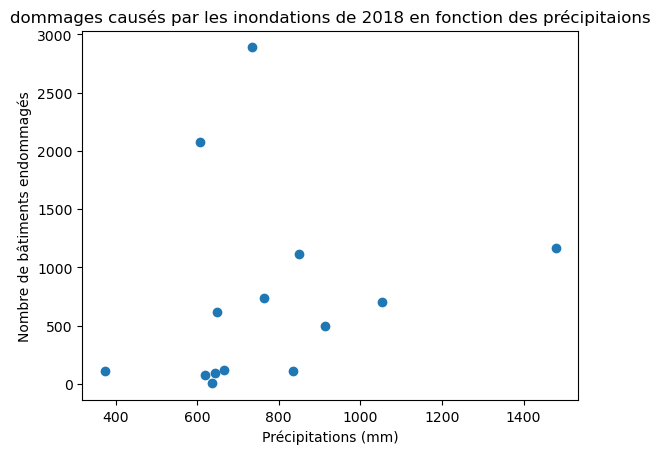

In [48]:
plt.scatter(df_flood['actual_rainfall_in_mm'], df_flood['full_damaged_houses'])
plt.xlabel('Précipitations (mm)')
plt.ylabel('Nombre de bâtiments endommagés')
plt.title('dommages causés par les inondations de 2018 en fonction des précipitaions')
plt.show()

On voit clairement qu'on a quelque chose de non linéaire pour les raisons citées ci-dessus. Cependant, on peut se questionner sur d'éventuelles inégalités d'infrastructures entre certains endroits, ou même la présence d'infrastructures telles que des barrages, etc. Est-ce réellement uniquement "la faute du climat" ? (On verra cela plus tard)

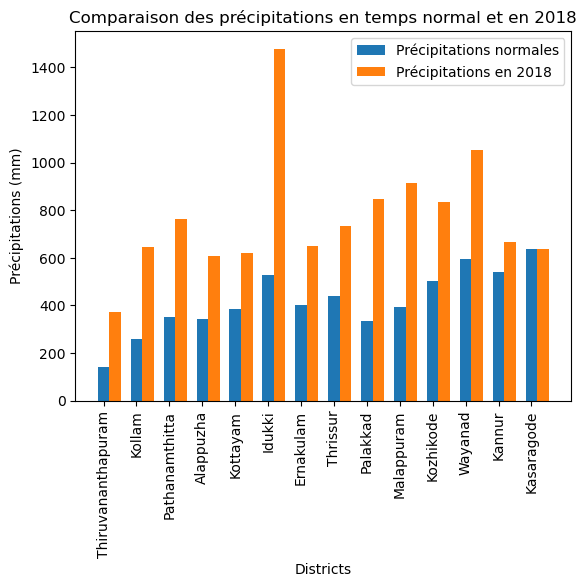

In [49]:
districts = df_flood['district'].tolist()
normal_rainfall = df_flood['normal_rainfall_in_mm'].tolist()
actual_rainfall = df_flood['actual_rainfall_in_mm'].tolist()

bar_positions = np.arange(len(districts))

plt.bar(bar_positions, normal_rainfall, 0.35, label='Précipitations normales')
plt.bar(bar_positions + 0.35, actual_rainfall, 0.35, label='Précipitations en 2018')

plt.xticks(bar_positions, districts, rotation=90)
plt.xlabel('Districts')
plt.ylabel('Précipitations (mm)')
plt.title('Comparaison des précipitations en temps normal et en 2018')

plt.legend()
plt.show()

On remarque que pour la quasi-totalité des districts, les précipitations ont augmentées considérablement.

On va comparer avec notre dataset initial pour voir l'ampleur.

On ne peut pas vraiment comparer l'intégralité du dataset avec celui initial, car ici nous n'avons pas toutes les données de précipitation du Kerala, mais seulement celles de certains districts fortement touchés par cette mousson dévastatrice.

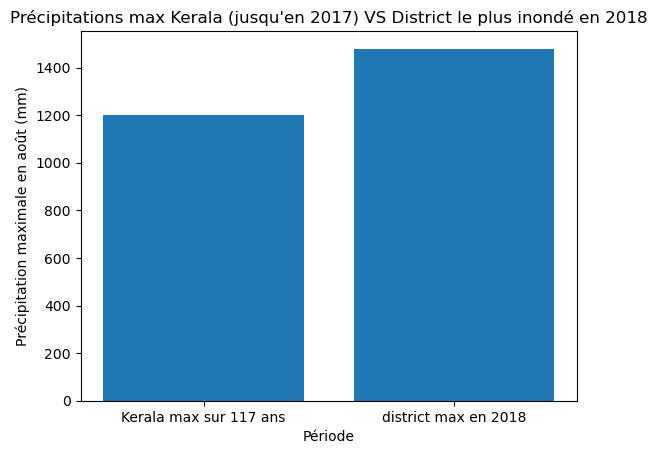

In [50]:
max_aug_df = df['AUG'].max()

max_aug_df_flood = df_flood['actual_rainfall_in_mm'].max()

fig, ax = plt.subplots()
ax.bar(['Kerala max sur 117 ans', 'district max en 2018'], [max_aug_df, max_aug_df_flood])
ax.set_xlabel('Période')
ax.set_ylabel('Précipitation maximale en août (mm)')
ax.set_title('Précipitations max Kerala (jusqu\'en 2017) VS District le plus inondé en 2018')
plt.show()

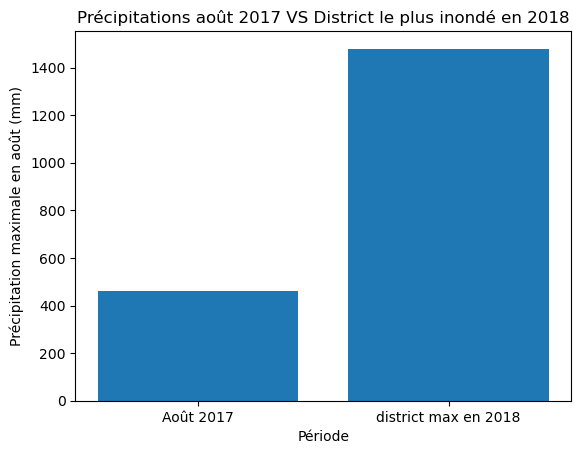

In [51]:
aug_2017_df = df.loc[df['YEAR'] == 2017, 'AUG'].values[0]

fig, ax = plt.subplots()
ax.bar(['Août 2017', 'district max en 2018'], [aug_2017_df, max_aug_df_flood])
ax.set_xlabel('Période')
ax.set_ylabel('Précipitation maximale en août (mm)')
ax.set_title('Précipitations août 2017 VS District le plus inondé en 2018')
plt.show()

On voit qu'en l'espace d'un an on est passés du coq à l'âne, d'une mousson sèche à un des pires épisodes d'innondations que la région ait connue.

<span style="font-size:1.25em; font-weight:normal;">
Résultats : 

Dans cette partie, nous avons analysé l'ampleur des dégâts qu'une mousson extrême peut provoquer en étudiant les conséquences des inondations de 2018 dans le district du Kerala. En effet, l'instabilité de la mousson a provoqué ces inondations responsables de centaines de morts et du déplacement d'un million d'Indiens. En comparant les précipitations avec le dataset initial, nous avons pris conscience de l'importance du phénomène et confirmé notre hypothèse précédente selon laquelle une augmentation de la variance des précipitations pourrait entraîner des événements extrêmes. Nous avons également remarqué qu'il n'y avait pas de relation linéaire entre les précipitations et les dégâts, suggérant l'existence d'autres facteurs qui ont contribué à l'ampleur des dégâts. Cette observation soulève la question de l'impact des infrastructures sur la prévention de ce type de catastrophe. Malheureusement, ces inondations se sont répétées en 2019 et 2020, ce qui montre que ce type d'événement reste un problème majeur à résoudre.

<span style="font-size:2em; font-weight:bold;">
Evolution du climat en Inde

Pour cette partie nous aurions aimé être un peu plus précis en ayant des données directement sur la région du Kerala, mais malgré maintes recherche nous n'avons rien trouvé ... On s'est donc rabattus sur la température dans la totalité de l'Inde dont le Kerala est forcément pris en compte. Cependant ce choix présente des limites, on ne pourra pas faire directement la corrélation de la température avec les précipitations (ce qui est très dommage), on va donc faire une partie "indépendante" afin de montrer que l'Inde se réchauffe car, nous le savons et ne pouvons que l'admettre, l'instabilité de la mousson et la baisse des précipiations dans le Kerala est dûe au réchauffement climatique.

Ci-dessous, une photo d'un sud-asiatique lors des fortes chaleurs de 2021, où à New-Delhi on a atteint 49 °C par exemple.  
https://www.radiofrance.fr/franceinter/podcasts/camille-passe-au-vert/camille-passe-au-vert-du-mercredi-18-mai-2022-6770300

<img src="temp_record_Kerala.jpg" alt="Mousson" width=400>

In [52]:
df_temp = pd.read_csv('temperatures.csv')

Aperçevons notre dataset :

In [53]:
df_temp.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [54]:
print("la dataset va de ", df_temp['YEAR'].min(), " à ", df_temp['YEAR'].max())

la dataset va de  1901  à  2017


In [55]:
df_temp.drop("YEAR", axis=1).max().max(), df_temp.drop("YEAR", axis=1).min().min()

(35.84, 22.0)

On a un dataset qui vient du gouvernement Indien (comme le premier), on retrouve par conséquent les mêmes colonnes et des températures qui vont également de 1901 à 2017. La température minimale enregistrée est de 22 °C, la température maximale enregistrée est de 36 °C.

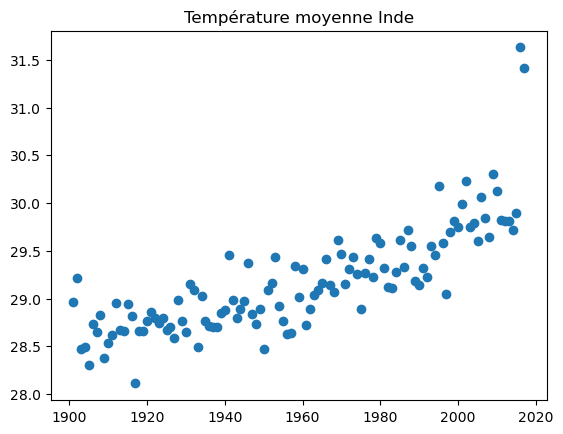

In [56]:
plt.scatter(df_temp['YEAR'],df_temp['ANNUAL'])
plt.title("Température moyenne Inde")
plt.show()

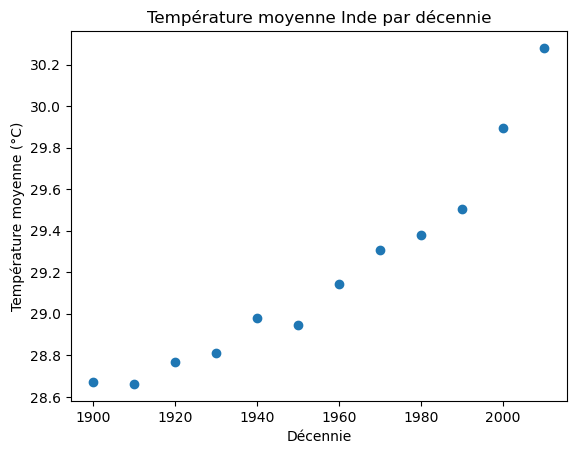

In [57]:
df_temp["Décennie"] = df_temp["YEAR"] // 10 * 10

moyennes_decennie = df_temp.groupby("Décennie")["ANNUAL"].mean()

plt.scatter(moyennes_decennie.index, moyennes_decennie.values)
plt.title("Température moyenne Inde par décennie")
plt.xlabel("Décennie")
plt.ylabel("Température moyenne (°C)")
plt.show()

Les graphiques au dessus nous montrent que la température augmente fortement en Inde, le premier graphique de part la forme de la courbe nous suggère de faire une régression polynomiale.

Régression polynomiale :

In [58]:
from sklearn.preprocessing import PolynomialFeatures
X = df_temp["YEAR"].values.reshape(-1, 1) 
y = df_temp["ANNUAL"].values

degree = 2

poly_features = PolynomialFeatures(degree)

X_poly = poly_features.fit_transform(X)

poly_regression = LinearRegression()

poly_regression.fit(X_poly, y)

LinearRegression()

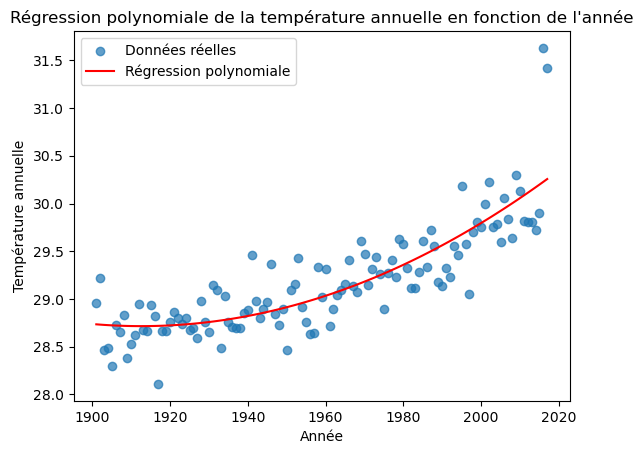

In [59]:
plt.scatter(X, y, label="Données réelles", alpha=0.7)
plt.plot(X, poly_regression.predict(X_poly), color="red", label="Régression polynomiale")

plt.xlabel("Année")
plt.ylabel("Température annuelle")
plt.title("Régression polynomiale de la température annuelle en fonction de l'année")
plt.legend()
plt.show()

La courbe de régression polynomiale nous confirme que la température augmente fortement.

Evolution de la température sur les saisons :

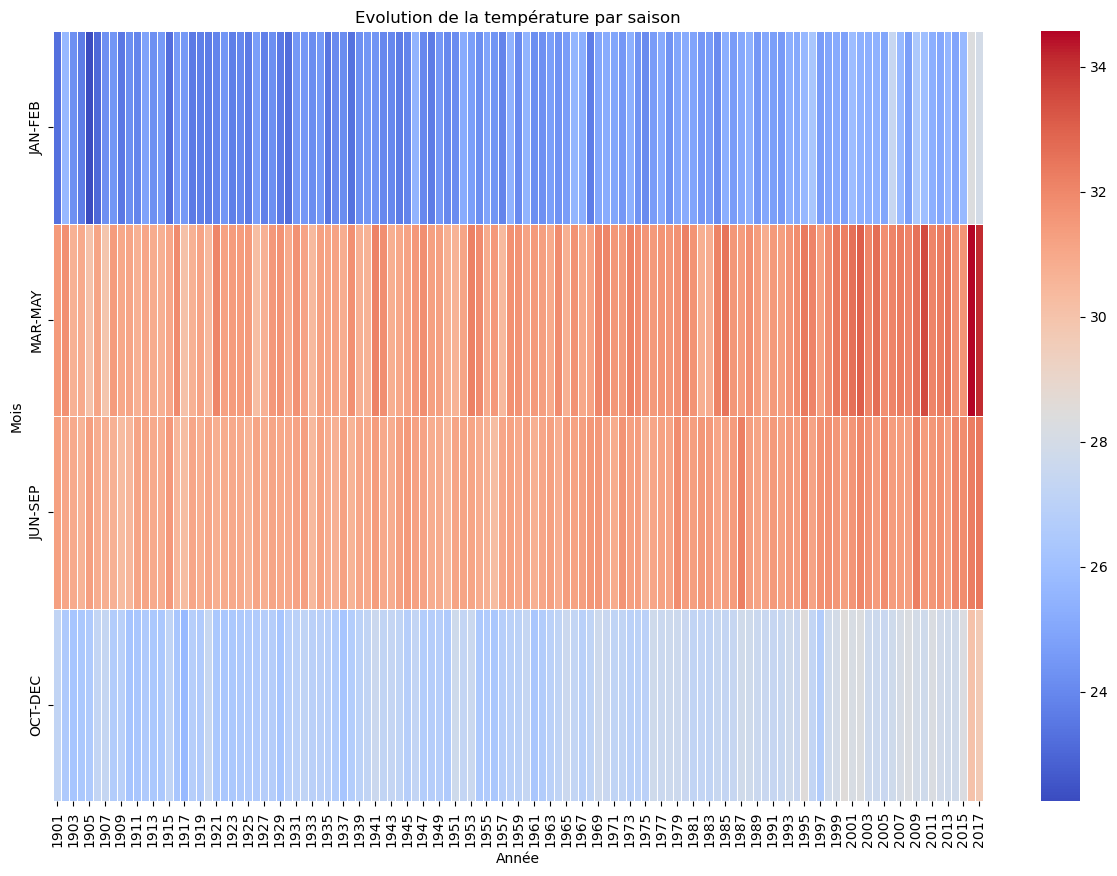

In [60]:
seasons = ['JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC']
heatmap_data = df_temp.set_index('YEAR')[seasons].T

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, fmt=".1f", linewidths=.5, ax=ax)

ax.set_title('Evolution de la température par saison')
ax.set_xlabel('Année')
ax.set_ylabel('Mois')

plt.show()

On remarque nettement que l'augmentation concerne toutes les saisons (peut-être un peu mois JUIN/SEP, on voit qu'en OCT/DEC on a viré carrément au rouge; On remarque également qu'en JAN/FE,B au début du XXème siècle on était autour de 24 °C et qu'au début du XXI ème on est 26/28 °C.

Cependant, c'est impossible de mettre ces données en relation avec la mousson dans le Kerala car en Inde, si elle est de Juin à Septembre dans la région que nous étudions, elle est d'Octobre à Novembre dans le Tamil Nadu.

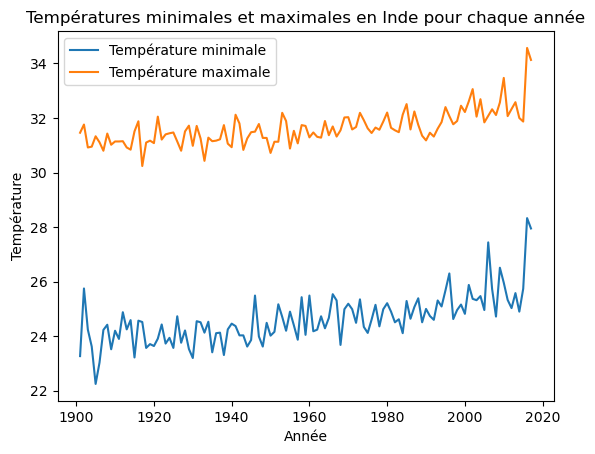

In [61]:
df_temp['min_temp'] = df_temp[seasons].min(axis=1)
df_temp['max_temp'] = df_temp[seasons].max(axis=1)

min_temp_year = df_temp.groupby('YEAR')['min_temp'].min()
max_temp_year = df_temp.groupby('YEAR')['max_temp'].max()

plt.figure()
plt.plot(min_temp_year.index, min_temp_year.values, label='Température minimale')
plt.plot(max_temp_year.index, max_temp_year.values, label='Température maximale')
plt.title("Températures minimales et maximales en Inde pour chaque année")
plt.xlabel("Année")
plt.ylabel("Température")
plt.legend()
plt.show()

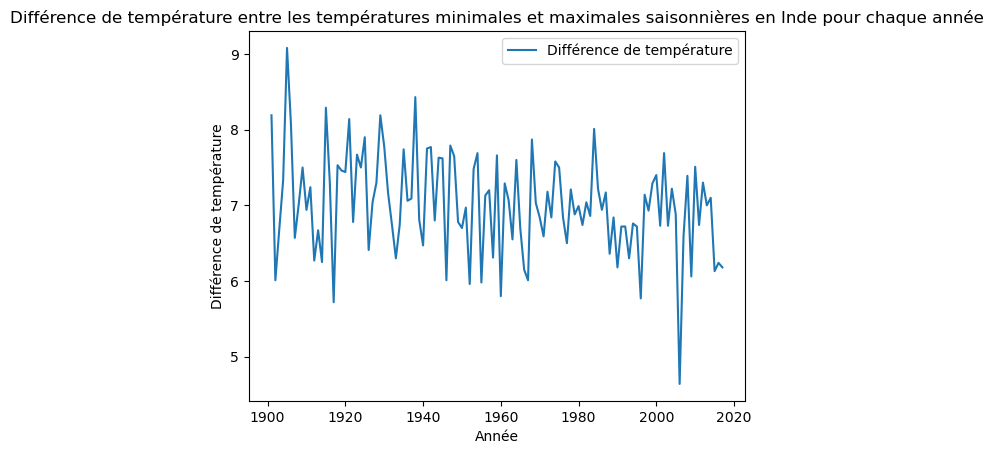

In [62]:
plt.figure()

temp_diff = max_temp_year - min_temp_year

plt.plot(temp_diff.index, temp_diff.values, label='Différence de température')

plt.title("Différence de température entre les températures minimales et maximales saisonnières en Inde pour chaque année")
plt.xlabel("Année")
plt.ylabel("Différence de température")
plt.legend()
plt.show()

La première courbe montre que les températures minimales et maximales augmentent de la même manière sans se rapprocher, ce qui confirme ce que l'on disait sur l'heatmap concernant toutes les saisons. La deuxième courbe sur l'évolution de la différence entre la température minimale et maximale est plutôt constante dans sa tendance malgré les fluctuations.

On va ensuite faire un test ANOVA pour voir si l'augmentation de la température est significative.

i) Test ANOVA
- C'est un test non paramètrique qui permet de comparer les moyennes de plusieurs groupes pour déterminer s'ils ont une différence signifcative.

In [63]:
import scipy.stats as stats

mid_year = 1959
first_half = df_temp[df_temp['YEAR'] <= mid_year]
second_half = df_temp[df_temp['YEAR'] > mid_year]


first_half_season_means = [first_half[season].mean() for season in seasons]
second_half_season_means = [second_half[season].mean() for season in seasons]
first_half_annual_mean = first_half['ANNUAL'].mean()
second_half_annual_mean = second_half['ANNUAL'].mean()

anova_results = []

for i in range(len(seasons)):
    f_statistic, p_value = stats.f_oneway(first_half[seasons[i]], second_half[seasons[i]])
    is_significant = "Oui" if p_value < 0.05 else "Non"
    anova_results.append((seasons[i], f_statistic, p_value, is_significant))
    
f_statistic_annual, p_value_annual = stats.f_oneway(first_half['ANNUAL'], second_half['ANNUAL'])
is_significant_annual = "Oui" if p_value_annual < 0.05 else "Non"

anova_results.append(('ANNUAL', f_statistic_annual, p_value_annual, is_significant_annual))

results_table = pd.DataFrame(anova_results, columns=['Season', 'F Statistic', 'P Value', 'Significatif'])
results_table

,Season,F Statistic,P Value,Significatif
0,JAN-FEB,59.275572,5.211032e-12,Oui
1,MAR-MAY,41.171922,3.223165e-09,Oui
2,JUN-SEP,70.263113,1.470817e-13,Oui
3,OCT-DEC,74.865647,3.520937e-14,Oui
4,ANNUAL,98.682594,3.652467e-17,Oui


Nous avons réalisé ces tests sur l'évolution de la température annuelle et des saisons en divisant notre série chronologique en deux. Nous avons remarqué que les différences sont significatives, ce qui conduit au rejet de l'hypothèse nulle H0. En effet, la température en Inde augmente pour toutes les saisons.

<span style="font-size:1.25em; font-weight:normal;">
Résultats :

Cette partie, bien que pouvant sembler superflue, est en réalité importante car elle démontre l'impact du réchauffement climatique sur l'Inde. Ce dernier est responsable des moussons meurtrières dans le Kerala ainsi que des moussons sèches que nous avons observées. Bien que nous aurions préféré avoir des données climatiques spécifiques au Kerala, cette partie vise à montrer les causes de l'instabilité des précipitations et à sensibiliser sur l'importance du climat. En effet, les courbes au début augmentent de manière si "simple" qu'on dirait des données artificielles utilisées dans les débuts de l'apprentissage automatique.

Pour combler les données manquantes, nous avons décidé d'utiliser la bibliographie afin d'obtenir des informations plus précises. En effet, dans un article du ["Turkish Journal of Computer and Mathematics Education"](article.pdf) datant de 2021, il est indiqué que la température maximale dans le district de Kottayam, dans le Kerala, a diminué, mais que la température minimale a augmenté, ce qui signifierait que les journées chaudes augmentent. De plus, les résultats montrent que les températures maximales diminuent moins que les températures minimales n'augmentent.  

<span style="font-size:1.25em; font-weight:normal;">
Résumé de parcours :

Au Kerala, les précipitations ont tendance à diminuer avec le temps, mais les moussons deviennent de plus en plus instables. Cette instabilité peut se traduire par des moussons sèches ou violentes (comme en 2017 et 2018). Cette instabilité et cette diminution des précipitations sont directement liées au réchauffement climatique, qui affecte de manière significative l'Inde et se manifeste par des journées plus chaudes dans des districts tels que Kottayam. Nous avons vu les conséquences humaines de ce danger, mais nous pouvons maintenant nous interroger sur l'impact de ce phénomène sur l'agriculture.

<span style="font-size:2em; font-weight:bold;">
    Et l'agriculture dans tout ça ?

<img src="agriculture_kerala.jpg" alt="Kerala" width=400>

L'agriculture est l'une des principales industries du Kerala, la pluie abondante que fournie la mousson est essentielle pour l'agriculture de la région, car elle permet la culture de cultures diverses telles que le riz, le caoutchouc, le thé, le poivre, les noix de coco et les fruits tropicaux. Cependant, le changement climatique et la variabilité des moussons ont un impact négatif sur l'agriculture de la région. Les sécheresses prolongées et les inondations soudaines provoquées par les changements climatiques ont des conséquences néfastes sur les cultures, ce qui affecte la productivité et la qualité des produits agricoles.

On a trouvé un tout petit dataset qui donne une vue assez globale sur l'utilisation des terres.

In [64]:
df_sols = pd.read_csv('Sols.csv')
df_sols

,,.1,.2,1914,1967,2007
0,Level I,Level II,Level III,Area (km2),Area (km2),Area (km2)
1,Built-up,Towns/cities,Towns/cities,1.625,3.936,10.133
2,Sub total,,,1.625,3.936,10.133
3,Agriculture,Crop land,Paddy,41.268,12.788,11.527
4,,,Banana,0,0,0.646
5,,,Mixed vegetables,0,0,0.811
6,,Plantation,Rubber,0,8.973,57.731
7,,,Coconut,,6.816,3.512
8,,,Mixed,270.534,306.463,256.719
9,Sub total,,,311.802,335.039,330.946


En analysant la df juste au dessus, on remarque que deux types de cultures ont subi de lourd changement au court du temps, les rizières et le caoutchouc.

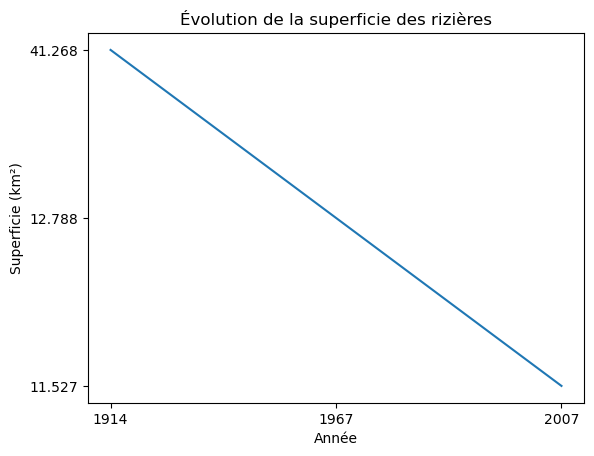

In [65]:
paddy = df_sols.iloc[3, 3:]

fig, ax = plt.subplots()

ax.plot(paddy.index, paddy.values)
ax.invert_yaxis()

ax.set_title("Évolution de la superficie des rizières")
ax.set_xlabel("Année")
ax.set_ylabel("Superficie (km²)")

plt.show()

On remarque que le nombre de rizières a complètement chuté depuis 1914.

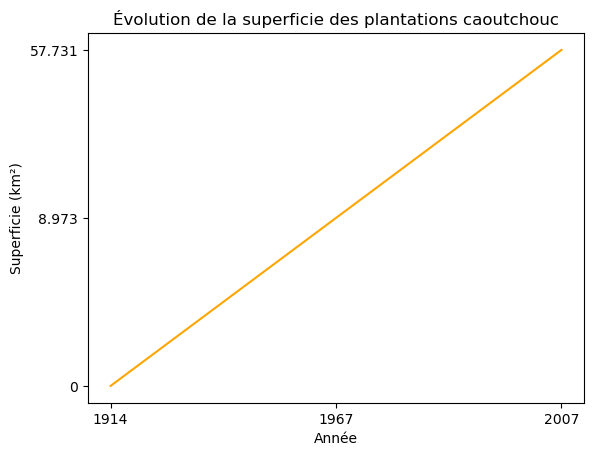

In [66]:
rubber = df_sols.iloc[6, 3:]

fig, ax = plt.subplots()

ax.plot(rubber.index, rubber.values, color='orange')

ax.set_title("Évolution de la superficie des plantations caoutchouc")
ax.set_xlabel("Année")
ax.set_ylabel("Superficie (km²)")

plt.show()

Et inversement, la superifcie de caoutchouc a énormément augmenté. En effet, elle représente en 2017 91% de la production naturelle de caoutchouc en Inde.

Ces deux graphiques montrent que le nombre de rizières a considérablement diminué, tandis que le nombre de plantations de caoutchouc a augmenté en parallèle. Ces données suggèrent une possible conversion des rizières en plantations de caoutchouc. Et en effet, on estime que 80 % des rizières du Kerala ont été converties en plantations de caoutchouc ou nivelées pour la construction.
  
  https://blog.cabi.org/2018/09/26/kerala-flooding-agricultural-impacts-and-environmental-degradation/

Cet article nous renseigne également sur l'impact des inondations sur l'agriculture. En effet, en 2018, des milliers d'hectares de terres ont été endommagés. De plus, l'industrie des plantations risque de perdre jusqu'à 40 % de ses cultures actuelles.

Ainsi, les inondations ont logiquement un impact direct sur les cultures. Nous avons vu dans un premier temps que les rizières ont été remplacées par des plantations de caoutchouc au fil du temps. Quel impact cela peut-il avoir lors des moussons violentes ?

<span style="font-size:2em; font-weight:bold;">
Le climat le seul responsable ?

En effet, il y a d'autres facteurs qui ont un impact sur les conséquences d'une mousson meurtrière. Dans la partie précédente, nous avons évoqué la substitution des rizières par les plantations de caoutchouc. GM Pillai, directeur de l'Institut Mondial de l'Energie Durable à Pune, affirme que la gravité des inondations est due au développement non durable des rizières traditionnelles, notamment leur conversion en plantations de caoutchouc. De plus, cela s'ajoute à la construction d'un aéroport sur des terres agricoles qui servaient de point de collecte des eaux, là où des précipitations ont frappé fortement en 2018. On retrouve également des cas de déforestation dans la région qui n'aident pas ainsi que des mines illégales qui ont de grosses conséquences sur la biodiversité (c'est un autre sujet).

En résumé, l'homme responsable du réchauffement du climatique et donc de l'instabilité de la mousson est également un facteur aggravant de part son exploitation non durable des sols. On devine donc une mauvaise gestion de l'arrivée de ces évenemments extrêmes.

<span style="font-size:2em; font-weight:bold;">
Conclusion

Dans ce projet, nous avons constaté que les précipitations globales dans le Kerala ont diminué, en particulier pendant la mousson. Cependant, nous avons remarqué que la région est devenue plus vulnérable aux événements extrêmes tels que les sécheresses ou les inondations. Ces observations sont en accord avec le rapport du GIEC qui considère que les événements extrêmes, comme ceux survenus en 2018, devraient devenir de plus en plus fréquents avec le changement climatique (en effet encore des cas d'inondations en 2019 et 2020).

Nous avons étudié la cause de l'instabilité de cette mousson, qui est le réchauffement climatique en Inde. Nous aurions souhaité disposer de données directement sur le Kerala, mais malheureusement, nous avons dû utiliser des données sur l'ensemble de l'Inde et des sources bibliographiques pour y remédier.

De même, les données sur l'agriculture n'étaient pas très accessibles, mais nous avons pu étudier un phénomène, la substitution des rizières par des plantations de caoutchouc , qui aggrave les événements extrêmes provoqués par le réchauffement climatique.

Dès les premières séances, nous avons commencé à travailler sur ce projet sans attendre. Nous avons rencontré certaines difficultés, notamment lors de la recherche de données comme cela a été mentionnée à plusieurs reprises. Nous avons également rencontré des difficultés lors des analyses, car certains articles ont émis des hypothèses similaires aux nôtres sur l'évolution globale, comme on peut le lire dans cet [article du CED (Centre for Education and Documentation (Inde))](http://base.d-p-h.info/fr/fiches/dph/fiche-dph-8610.html). Cependant, d'autres sources indiquent que les précipitations augmentent, ce qui nous a parfois fait douter et même reconsidérer notre choix de problème. Grâce à vos conseils et dû fait que nous avions déjà commencé à travailler sur ce sujet, nous sommes restés sur cette problématique et avons utilisé tous les moyens à notre disposition pour effectuer nos analyses.

On a découpé les différentes parties du projet ensemble et avons commencé les premières implémentations tous ensemble. Marwan s'est davantage penché sur l'évolution de la mousson, qu'Ilan a ensuite complétée, pour finalement continuer sur les inondations de 2018. Youssef s'est concentré sur la partie du climat en Inde ainsi que sur l'apport bibliographique nécessaire. Ensuite, la partie finale sur l'agriculture a été réalisée globalement en groupe. Cette répartition n'est pas "stricte", car nous avons travaillé ensemble la plupart du temps, ce qui nous a permis à tous d'avoir une compréhension globale du projet et de discuter ensemble de toutes les parties. Au final, personne n'a fait exception et tout le monde a pu progresser et contribuer à ce rendu qui nous satisfait dans son ensemble.

                                                                        Ilan Aliouchouche
                                                                        Marwan Khairallah
                                                                        Youssef Mir